<a href="https://colab.research.google.com/github/amalayil23/MLFinalG7/blob/main/ML_Final_Group_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
!git clone https://github.com/amalayil23/MLFinalG7



fatal: destination path 'MLFinalG7' already exists and is not an empty directory.


# Description of Features


**pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status.
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels.
The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water.
Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium,
sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water.
This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for
TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to
treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.
The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges
from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water.
Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a
solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources.
TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water,
and < 4 mg/Lit in source water which is use for treatment.

**Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of
organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated.
THM levels up to 80 ppm is considered safe in drinking water.

**Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water
and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for
Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.




In [110]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/MLFinalG7/water_potability.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [111]:
#Inspecting amount of null value.

null_data = pd.DataFrame()

feature= []
nullcount =[]
nullPc = []
for i in data.columns:
  feature.append(i)
  nullcount.append(data[i].isnull().sum())
  nullPc.append((((data[i].isnull().sum())/3276)*100).round(2))


null_data["Feature"] = feature
null_data["Null_Count"] = nullcount
null_data["Null %"] = nullPc

null_data.head(10)


,Feature,Null_Count,Null %
0,ph,491,14.99
1,Hardness,0,0.00
2,Solids,0,0.00
3,Chloramines,0,0.00
4,Sulfate,781,23.84
5,Conductivity,0,0.00
6,Organic_carbon,0,0.00
7,Trihalomethanes,162,4.95
8,Turbidity,0,0.00
9,Potability,0,0.00


Total Samples = 3276 <br>
ph- has 491 null values 14.99% <br>
Sulfate - has 781,  null values 23.84% <br>
Trihalomethanes has 162 null values 4.95% .




In [112]:
# Dropping rows with null-value for sulphate as around 25% of values are null in this feature.
data.dropna(subset=['Sulfate'], inplace=True)

#Replacing other missing values with mean.
col_mean = data.mean()
data.fillna(col_mean, inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2495 entries, 0 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2495 non-null   float64
 1   Hardness         2495 non-null   float64
 2   Solids           2495 non-null   float64
 3   Chloramines      2495 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     2495 non-null   float64
 6   Organic_carbon   2495 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2495 non-null   float64
 9   Potability       2495 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 214.4 KB


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2495.000000  2495.000000   2495.000000  2495.000000  2495.000000   
mean      7.083824   196.213489  22065.860761     7.119219   333.775777   
std       1.460755    32.689075   8763.541797     1.584166    41.416840   
min       0.227499    47.432000    320.942611     0.352000   129.000000   
25%       6.284685   176.855409  15623.966291     6.121563   307.699498   
50%       7.083824   197.142637  21043.626929     7.135063   333.073546   
75%       7.859798   216.421982  27372.857057     8.106435   359.950170   
max      14.000000   317.338124  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   2495.000000     2495.000000      2495.000000  2495.000000  2495.000000  
mean     425.529584       14.328318        66.293795     3.967982     0.394790  
std       80.774995        3.308675        15.681253     0.782624     0.488903  


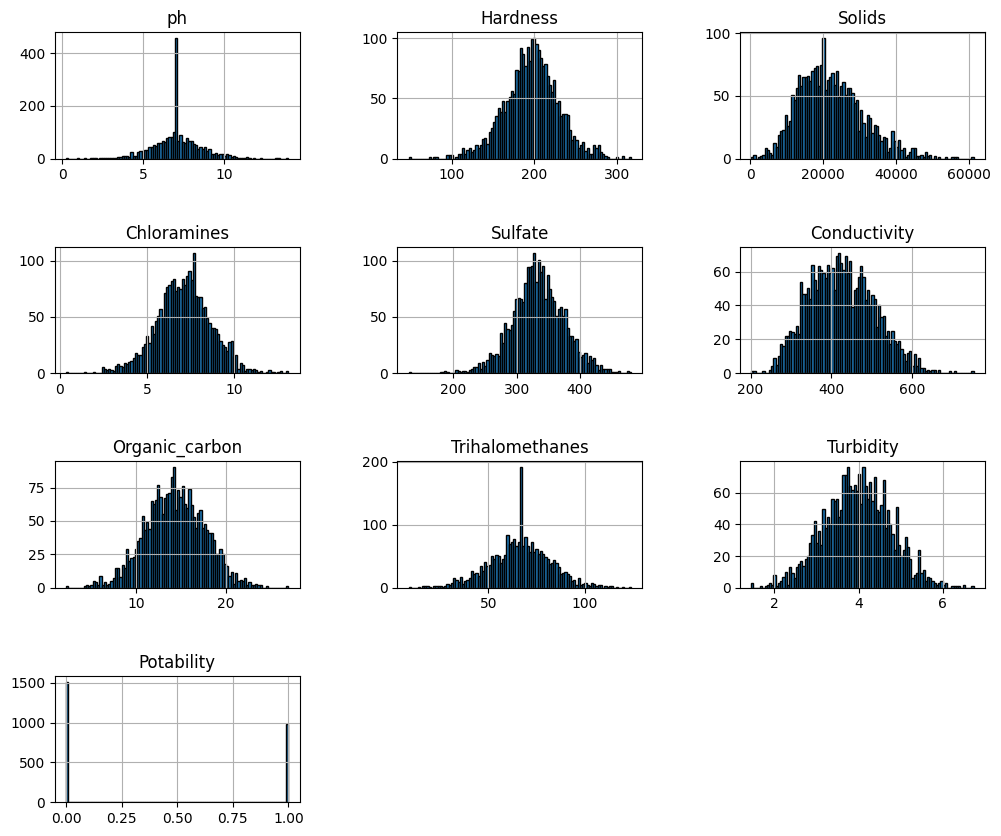

In [113]:
print(data.describe())
data.hist(figsize=(12, 10), bins=100, edgecolor="black")
plt.title('Before EDA')
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

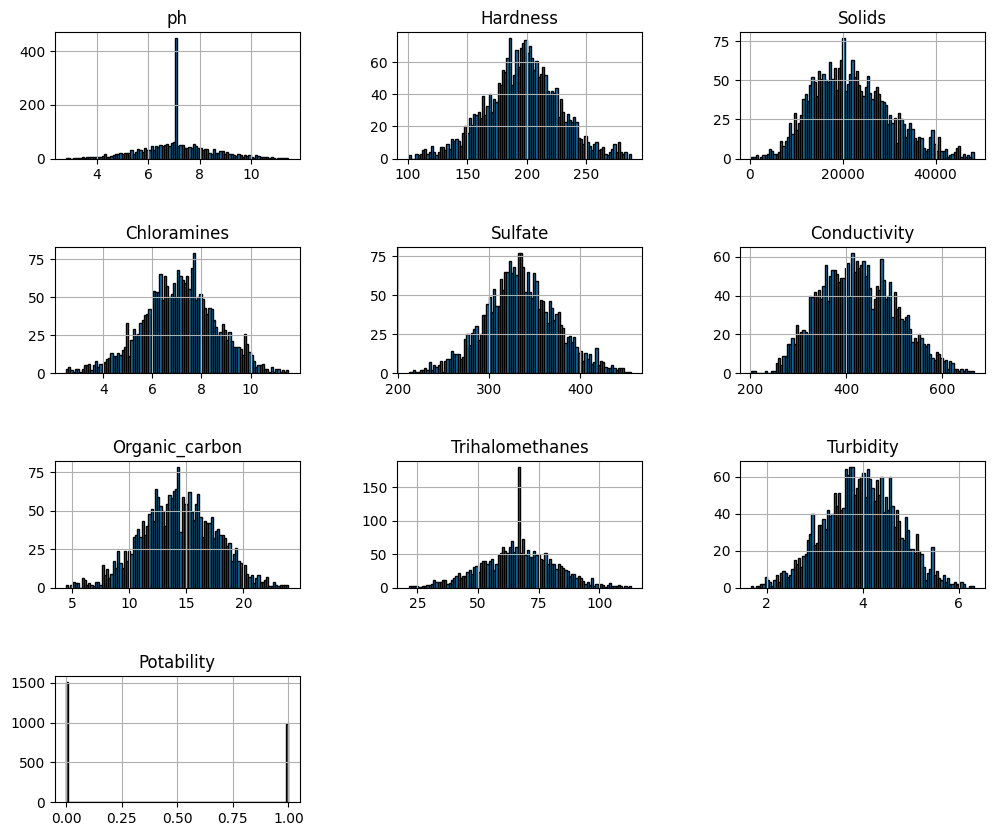

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,7.086473,196.514866,21897.150270,7.108567,334.082413,425.078865,14.327901,66.371639,3.965904,0.394790
std,1.371901,31.538704,8462.655989,1.522056,39.722633,79.975992,3.277279,15.212915,0.769551,0.488903
min,2.803563,100.457615,320.942611,2.484380,211.851592,201.619737,4.466772,21.355275,1.680554,0.000000
25%,6.320844,177.223718,15623.966291,6.127721,308.292153,365.210558,12.089421,56.922944,3.438878,0.000000
50%,7.083824,197.028926,21043.626929,7.119219,333.334469,421.625238,14.261743,66.293795,3.965647,0.000000
75%,7.833428,216.180324,27217.362359,8.089368,359.591002,480.674004,16.612853,76.339414,4.500616,1.000000
max,11.449739,287.975540,48204.172192,11.543190,455.451234,666.690618,23.952450,113.048886,6.307678,1.000000


In [114]:
# Replacing All values 3 standard deviations away from mean with the mean.

for i in data.columns:
  data.loc[data[i]>(data[i].mean() + 3*(data[i].std())), i] = data[i].mean()
  # print("{} | MaxThresh:{} | MinThresh:{}".format(i,(data[i].mean()+ 3*(data[i].std())).round(2),(data[i].mean() - 3*(data[i].std())).round(2)))
  data.loc[data[i]<(data[i].mean() - 3*(data[i].std())), i] = data[i].mean()


print("\n")
# print(data.describe())
data.hist(figsize=(12, 10), bins=100, edgecolor="black")
plt.title('After EDA')
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()
data.describe()

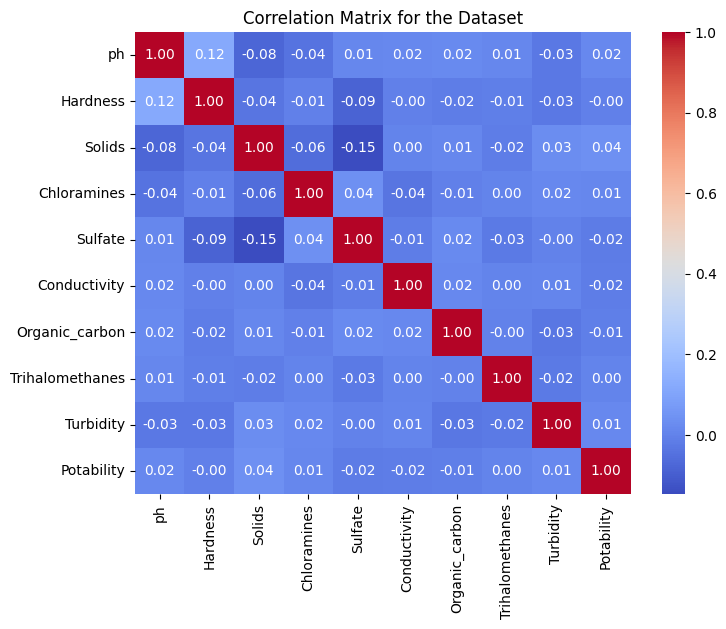

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for the Dataset')
plt.show()

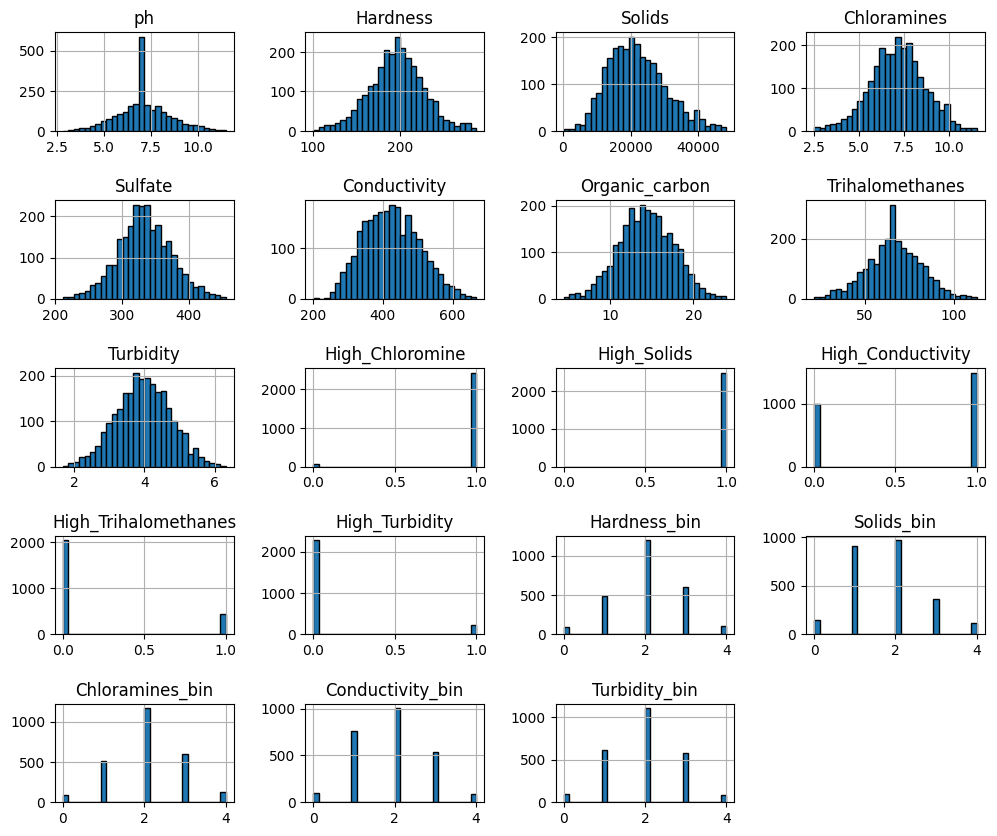

In [116]:
#Feature engineering
import numpy as np

# affordabilityThreshold = 700000
# housing['Affordability'] = np.where(housing['Price'] < affordabilityThreshold, 'Affordable', 'Unaffordable')


#Creating new features bases on Threshold values of each feature.

Thresholds = {'ph':8.5, 'Hardness':0, 'Solids':1000, 'Chloramines':4, 'Sulfate':500, 'Conductivity':400,
       'Organic_carbon':0, 'Trihalomethanes':80, 'Turbidity':5, 'Potability':0 }

data['High_Chloromine'] = np.where(data['Chloramines']> Thresholds['Chloramines'], 1,0)
data['High_Solids'] = np.where(data['Solids']>Thresholds['Solids'], 1,0)
data['High_Conductivity'] = np.where(data['Conductivity']>Thresholds['Conductivity'], 1,0)
data['High_Trihalomethanes'] = np.where(data['Trihalomethanes']>Thresholds['Trihalomethanes'], 1,0)
data['High_Turbidity'] = np.where(data['Turbidity']>Thresholds['Turbidity'], 1,0)

data.head()

X = data.drop(columns=['Potability'])
y = data['Potability']


#Binning features and creating additional features
bin_size = 5
X["Hardness_bin"] = pd.cut(X["Hardness"], bins=bin_size, labels=range(bin_size)).astype(float)
X["Solids_bin"] = pd.cut(X["Solids"], bins=bin_size, labels=range(bin_size)).astype(float)
X['Chloramines_bin'] = pd.cut(X['Chloramines'], bins=bin_size, labels=range(bin_size)).astype(float)
X['Conductivity_bin'] = pd.cut(X['Conductivity'], bins=bin_size, labels=range(bin_size)).astype(float)
X['Turbidity_bin'] = pd.cut(X['Turbidity'], bins=bin_size, labels=range(bin_size)).astype(float)

X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

#Lists to store metrics of all models, to be used during model evaluation
Accuracy =[]
Precision = []
Recall = []
Specificity = []
F1_Score = []

#Gaussian Naive Bayes Classifier

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# Gaussian Naive Bayes Classifier ##

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Create and train the Gaussian Naive Bayes classifier
model_gb=GaussianNB()
model_gb.fit(X_train,y_train)


# Make predictions on the test set
y_pred = model_gb.predict(X_test)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)

# Calculate Specificity
# specificity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])
# Print the Results_1
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"\n Accuracy: {accuracy}")
print(f"\n Precision: {precision}")
print(f"\n Recall: {recall}")
print(f"\n F1 Score: {f1}")
print(f"\n Specificity: {specificity}")

#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
Specificity.append(specificity)
F1_Score.append(f1)

Confusion Matrix:
[[376  79]
 [227  67]]

 Accuracy: 0.5914552736982643

 Precision: 0.4589041095890411

 Recall: 0.22789115646258504

 F1 Score: 0.30454545454545456

 Specificity: 0.6235489220563848


# **Random Forests**

In [118]:
# Decision trees - Random Forests #

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)



#create and train Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=35)
model_rf.fit(X_train, y_train)



# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])

# Print evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
Specificity.append(specificity)
F1_Score.append(f1)


Confusion Matrix:
[[393  62]
 [197  97]]
Accuracy: 0.6542056074766355
Precision: 0.610062893081761
Recall: 0.3299319727891156
Specificity: 0.6661016949152543
F1 Score: 0.4282560706401766


# **Hyperparameter Tuning - Randomized Search**

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

model = SVC()

# Define the parameter distribution for randomized search
param_dist = {
    'C': [0.1, 1, 10, 100],
    'degree': [ 1,2,4,10],
    'coef0': [0.0,0.1, 0.2,0.4],
    #'kernel': ['linear', 'rbf', 'poly']
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Perform randomized search, where n_iter is the number of parameter settings that are sampled
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv= cv, scoring='accuracy',n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters and evaluate on the test set
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

print("\nRandomized Search Results:")
print("Best Parameters:", best_params_random)
print("Test Accuracy:", accuracy_random)

#Saving the parameters into a dictionary to be used for SVM.
params = best_params_random


Randomized Search Results:
Best Parameters: {'degree': 10, 'coef0': 0.2, 'C': 1}
Test Accuracy: 0.6074766355140186


# **Support Vector Machines (SVMs)**

In [120]:
# Support Vector Machines (SVMs)

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)


#create and train SVC
# model_svm = SVC(kernel= 'poly', degree= params['degree'], coef0=params['coef0'], C=params['C'])
model_svm = SVC(kernel= 'poly', degree= 10, coef0=0.4 , C= 100)
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_svm.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])

# Print evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")

#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
Specificity.append(specificity)
F1_Score.append(f1)


Confusion Matrix:
[[437  18]
 [261  33]]
Accuracy: 0.6275033377837116
Precision: 0.6470588235294118
Recall: 0.11224489795918367
Specificity: 0.6260744985673352
F1 Score: 0.19130434782608696


# **Decision Tree Classifier**

Accuracy: 0.582109479305741
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66       459
         1.0       0.46      0.45      0.46       290

    accuracy                           0.58       749
   macro avg       0.56      0.56      0.56       749
weighted avg       0.58      0.58      0.58       749



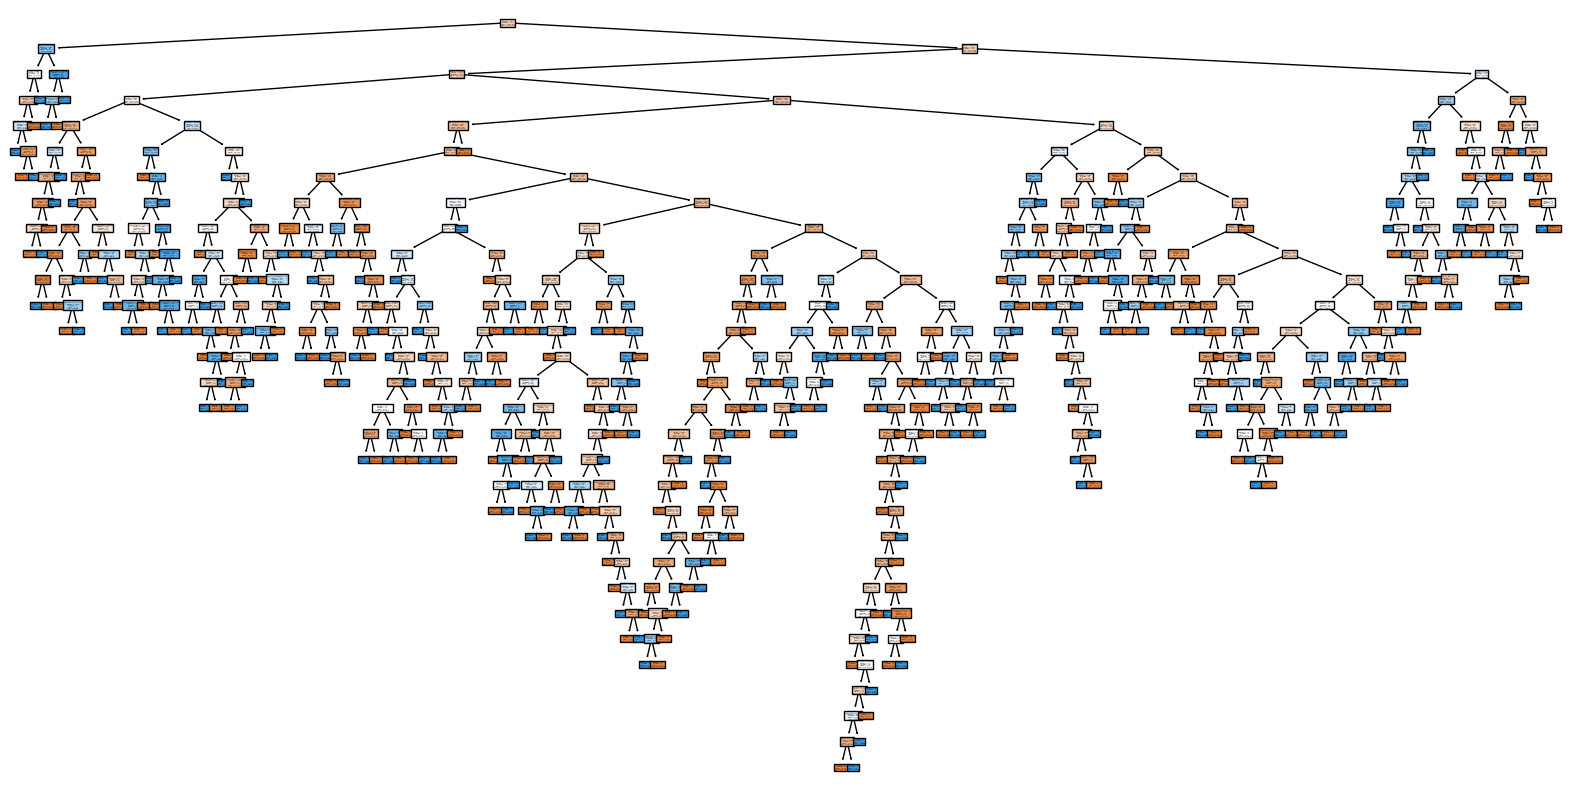

In [121]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#create and train Decsion tree
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_dt.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True)
plt.show()

#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
Specificity.append(specificity)
F1_Score.append(f1)

#  K-Nearest

In [122]:
#refernce: https://www.ibm.com/topics/knn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

# Impute missing values in both training and test sets
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbor Classifier
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_knn.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
Specificity.append(specificity)
F1_Score.append(f1)

Accuracy: 0.5450901803607214
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65       315
         1.0       0.36      0.31      0.33       184

    accuracy                           0.55       499
   macro avg       0.50      0.50      0.49       499
weighted avg       0.53      0.55      0.54       499



# **Deep Neural**

(2495, 19) (2495,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 19)                0         
                                                                 
 dense_24 (Dense)            (None, 19)                380       
                                                                 
 dense_25 (Dense)            (None, 19)                380       
                                                                 
 dense_26 (Dense)            (None, 5)                 100       
                                                                 
 dense_27 (Dense)            (None, 1)                 6         
                                                                 
Total params: 866 (3.38 KB)
Trainable params: 866 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

....

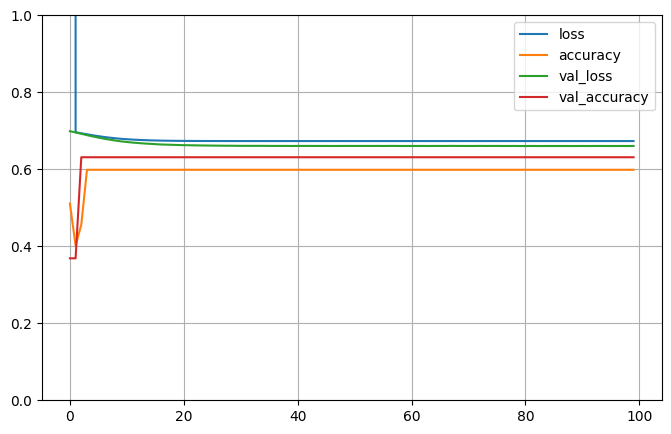



..............................Testing............................

16/16 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.6313

Test Accuracy: 0.6312625408172607


In [123]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Dense
from sklearn.preprocessing import OneHotEncoder

X.head()

print(X.shape, y.shape)



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define a sequential neural network model
model_dn = Sequential([
    Flatten(input_shape=(19,)),  # Input layer flatten the input
    Dense(19, activation='relu'),  # First hidden layer with 10 neurons and ReLU activation
    Dense(19, activation='relu'),  # Second hidden layer with 10 neurons and ReLU activation
    Dense(5, activation='relu'),   # Third hidden layer with 5 neurons and ReLU activation
    Dense(1, activation='sigmoid') # Output layer with 1 neurons  sigmoid activation
])

# Print the summary of the model
model_dn.summary()



# Compile the model
model_dn.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

# Train the  with early stopping and checkpoint
print("\n..............................Training............................\n")
checkpoint_cb = keras.callbacks.ModelCheckpoint("Dataset_A_model.keras",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=25,restore_best_weights=True)
history = model_dn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,callbacks=[checkpoint_cb,early_stopping_cb], validation_data=(X_test, y_test))
model = keras.models.load_model("Dataset_A_model.keras")

#Saving the model
model.save("Dataset_A_model.keras")




#a graph that depicts loss, accuracy, val_loss, and val_accuracy.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
print()
print("\n..............................Testing............................\n")
loss, accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", accuracy)

#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(0)
Recall.append(0)
Specificity.append(0)
F1_Score.append(0)

# **Ensemble**

In [124]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

model_GNB = GaussianNB()
model_svm =SVC(kernel= 'poly', degree= params['degree'], coef0=params['coef0'], C=params['C'])
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, random_state=35)
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

from sklearn.ensemble import VotingClassifier
model_ens = VotingClassifier(estimators=[('Gaussian NB', model_GNB),
                                    ('Decision Tree', model_dt),
                                    ('Random Forest', model_rf),
                                    ('SVM', model_svm),
                                    ('K-Near', model_svm)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

model_ens.fit(X_train, y_train)


voting_pred = model_ens.predict(X_test)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, voting_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_test, voting_pred)

# Calculate Precision
precision = precision_score(y_test, voting_pred)

# Calculate Recall
recall = recall_score(y_test, voting_pred)

# Calculate F1 Score
f1 = f1_score(y_test, voting_pred)

#Specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])

# Print the results
print("\n Ensemble with Majority Voting Performance")
print("============================================\n")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"\n Accuracy: {accuracy}")
print(f"\n Precision: {precision}")
print(f"\n Recall: {recall}")
print(f"\n Specificity: {specificity}")
print(f"\n F1 Score: {f1}")

#Appending the lists with the metrics for this model
Accuracy.append(accuracy)
Precision.append(precision)
Recall.append(recall)
Specificity.append(specificity)
F1_Score.append(f1)


 Ensemble with Majority Voting Performance

Confusion Matrix:
[[419  25]
 [262  43]]

 Accuracy: 0.616822429906542

 Precision: 0.6323529411764706

 Recall: 0.14098360655737704

 Specificity: 0.6152716593245228

 F1 Score: 0.23056300268096513


In [125]:
#Storing the results of all models into dataframe Results1
Results1 = pd.DataFrame()
Results1["Model"] = ["GaussianNB","RandomForest","SVM","DecsionTree","KNearestNeighbor","DeepNeural","Ensemble"]
Results1["Accuracy"] = Accuracy
Results1["Precision"] = Precision
Results1["Recall"] = Recall
Results1["Specificity"] = Specificity
Results1["F1_Score"] =  F1_Score

In [126]:
#Funtion to make predictions using models and store metrics into a pandas dataframe.
def ResultsPD(models):
  Results = pd.DataFrame() # data frame to store results - return variable
  #lists to store values for each model
  Accuracy =[]
  Precision = []
  Recall = []
  Specificity = []
  F1_Score = []

  for i in models:
    if i == "DeepNeural":
      loss, accuracy = models[i].evaluate(X_test, y_test)
      Accuracy.append(accuracy)
      Precision.append(0)
      Recall.append(0)
      Specificity.append(0)
      F1_Score.append(0)

    else:
      y_pred = models[i].predict(X_test)
      conf_matrix = confusion_matrix(y_test, y_pred)
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[1, 0])
      Accuracy.append(accuracy)
      Precision.append(precision)
      Recall.append(recall)
      Specificity.append(specificity)
      F1_Score.append(f1)


  Results["Model"] = ["GaussianNB","RandomForest","SVM","DecsionTree","KNearestNeighbor","DeepNeural","Ensemble"]
  Results["Accuracy"] = Accuracy
  Results["Precision"] = Precision
  Results["Recall"] = Recall
  Results["Specificity"] = Specificity
  Results["F1_Score"] =  F1_Score
  return Results



# **PCA**

In [127]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


clustering = KMeans(n_clusters = 3).fit(X)
labels = clustering.labels_

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Reducing 17 features down to 10

transformed_data = scaled_X
i =16
while (i>=10):
  pca = PCA(n_components=i,svd_solver='randomized')  # Specify the number of principal components
  pca.fit(transformed_data)  # Fit the PCA model to the scaled data
  transformed_data = pca.transform(transformed_data)  # Transform the data to the new feature space
  i-=1


eigen_values = pca.explained_variance_ #eigenvalues

eigen_vectors = pca.components_  # Directions of Principal components (i.e., the directions in the original
# feature space along which the data varies the most (eigenvectors)

variance = pca.explained_variance_ratio_  # Percentage of variance contribution by each of the selected components


print("\nVariance ratio for the first ten PCs:", variance)

print("\nTotal variance ratio: ", variance.sum())

#Saving the transformed data to be used
X = pd.DataFrame(transformed_data)





Variance ratio for the first ten PCs: [0.15394505 0.13655477 0.12768625 0.11481572 0.10821983 0.09495677
 0.05886932 0.05625378 0.05323644 0.05263457]

Total variance ratio:  0.9571724911001841


# **Training the models with transformed data from PCA**

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import RandomOverSampler

# Dictionary to store trained models. will be used as an argument into ResultsPD()
models = {}

# Gaussian Naive Bayes Classifier ##

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# # Initialize RandomOverSampler (1:4 ratio)
# ros = RandomOverSampler(sampling_strategy=0.70, random_state=30)

# # Fit and transform the training data
# X_train, y_train = ros.fit_resample(X_train, y_train)

# Create and train the Gaussian Naive Bayes classifier
model_gb=GaussianNB()
model_gb.fit(X_train,y_train)
models["Gaussian"] = model_gb

#create and train Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=35)
model_rf.fit(X_train, y_train)
models["RandomForest"] = model_rf

#create and train SVC
model_svm = SVC(kernel= 'poly', degree= 10, coef0=0.4 , C= 100)
model_svm.fit(X_train, y_train)
models["SVM"] = model_svm

#create and train Decsion tree
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_dt.fit(X_train, y_train)
models["DecsionTree"] = model_dt

# Create a K-Nearest Neighbor Classifier
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_knn.fit(X_train, y_train)
models["KNeighbor"] = model_knn

#Deep Neural
model_dn = Sequential([
    Flatten(input_shape=(10,)),  # Input layer flatten the input
    Dense(10, activation='relu'),  # First hidden layer with 10 neurons and ReLU activation
    Dense(10, activation='relu'),  # Second hidden layer with 10 neurons and ReLU activation
    Dense(5, activation='relu'),   # Third hidden layer with 5 neurons and ReLU activation
    Dense(1, activation='sigmoid') # Output layer with 1 neurons  sigmoid activation
])
model_dn.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
# Train the model
print("\n..............................Training............................\n")
checkpoint_cb = keras.callbacks.ModelCheckpoint("Dataset_A_model.keras",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=25,restore_best_weights=True)
history = model_dn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,callbacks=[checkpoint_cb,early_stopping_cb], validation_data=(X_test, y_test))
model = keras.models.load_model("Dataset_A_model.keras")
models["DeepNeural"] = model_dn

#Ensemble

model_ens = VotingClassifier(estimators=[('Gaussian NB', model_gb),
                                    ('Decision Tree', model_dt),
                                    ('Random Forest', model_rf),
                                    ('SVM', model_svm),
                                    ('K-Near', model_svm)])
model_ens.fit(X_train, y_train)
models["Ensemble"] = model_ens


..............................Training............................

Epoch 1/100
55/55 [==============================] - 1s 8ms/step - loss: 0.6870 - accuracy: 0.6037 - val_loss: 0.6765 - val_accuracy: 0.5928
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.6037 - val_loss: 0.6746 - val_accuracy: 0.5968
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.6088 - val_loss: 0.6732 - val_accuracy: 0.5968
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.6157 - val_loss: 0.6720 - val_accuracy: 0.6142
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.6168 - val_loss: 0.6688 - val_accuracy: 0.6142
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.6214 - val_loss: 0.6669 - val_accuracy: 0.6195
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6596 - acc

# **Comparing Model Performance before and After PCA**

In [129]:
# Making predictions and saving results to dataframe Res2
Res2 = ResultsPD(models)
print("**********Model Performances before PCA**********************")
#Dataframe from before PCA
print(Results1.head(7),"\n")
print("\n\n**********Model Performances After PCA**********************")
print(Res2.head(7))

24/24 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6422
**********Model Performances before PCA**********************
              Model  Accuracy  Precision    Recall  Specificity  F1_Score
0        GaussianNB  0.591455   0.458904  0.227891     0.623549  0.304545
1      RandomForest  0.654206   0.610063  0.329932     0.666102  0.428256
2               SVM  0.627503   0.647059  0.112245     0.626074  0.191304
3       DecsionTree  0.582109   0.647059  0.112245     0.626074  0.191304
4  KNearestNeighbor  0.545090   0.647059  0.112245     0.626074  0.191304
5        DeepNeural  0.631263   0.000000  0.000000     0.000000  0.000000
6          Ensemble  0.616822   0.632353  0.140984     0.615272  0.230563 



**********Model Performances After PCA**********************
              Model  Accuracy  Precision    Recall  Specificity  F1_Score
0        GaussianNB  0.535381   0.436321  0.629252     0.664615  0.515320
1      RandomForest  0.640854   0.567568  0.35

When comparing among all models in context of the this problem, ensemble seems to perform the best overall with 48.29% recall, 68.13% specificity and 62.35% accuracy.